In [1]:
path = '/home/edocame/Desktop/data_python/report metatrader/eurchf lunghi lookback market orders.xml'

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
from xml.dom import minidom
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
def parse_metatrader_xml(xml_path):
    """
    Parse MetaTrader optimization XML file and return a DataFrame
    """
    # Parse the XML file
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    # Define namespace
    ns = {'ss': 'urn:schemas-microsoft-com:office:spreadsheet'}
    
    # Find the table
    table = root.find('.//ss:Table', ns)
    
    if table is None:
        print("No table found in XML")
        return None
    
    # Extract data rows
    rows = table.findall('ss:Row', ns)
    
    if len(rows) < 2:
        print("Not enough rows found")
        return None
    
    # Get headers from first row
    header_row = rows[0]
    headers = []
    for cell in header_row.findall('ss:Cell', ns):
        data = cell.find('ss:Data', ns)
        if data is not None:
            headers.append(data.text)
    
    print(f"Headers found: {headers}")
    
    # Extract data from remaining rows
    data = []
    for row in rows[1:]:
        row_data = []
        cells = row.findall('ss:Cell', ns)
        
        for i, cell in enumerate(cells):
            data_elem = cell.find('ss:Data', ns)
            if data_elem is not None:
                # Try to convert to number if possible
                try:
                    value = float(data_elem.text)
                except (ValueError, TypeError):
                    value = data_elem.text
                row_data.append(value)
            else:
                row_data.append(None)
        
        # Only add row if it has data
        if any(x is not None for x in row_data):
            data.append(row_data)
    
    # Create DataFrame
    df = pd.DataFrame(data, columns=headers)
    
    print(f"Parsed {len(df)} optimization results")
    return df

# Parse the XML file
df = parse_metatrader_xml(path)
print(f"\\nDataFrame shape: {df.shape}")
print(f"\\nFirst few rows:")
df.head()

Headers found: ['Pass', 'Result', 'Profit', 'Expected Payoff', 'Profit Factor', 'Recovery Factor', 'Sharpe Ratio', 'Custom', 'Equity DD %', 'Trades', 'BBPeriod', 'BBDeviation']
Parsed 88 optimization results
\nDataFrame shape: (88, 12)
\nFirst few rows:


,Pass,Result,Profit,Expected Payoff,Profit Factor,Recovery Factor,Sharpe Ratio,Custom,Equity DD %,Trades,BBPeriod,BBDeviation
0,19.0,11485.9,1485.9,5.003030,1.949275,5.527902,3.642499,0.0,2.4848,297.0,2800.0,1.0
1,20.0,11394.2,1394.2,4.926502,1.880177,5.303157,3.411041,0.0,2.4497,283.0,2900.0,1.0
2,21.0,11371.2,1371.2,5.041176,1.872764,5.239587,3.351008,0.0,2.4445,272.0,3000.0,1.0
3,18.0,11356.7,1356.7,4.537458,1.852091,5.047247,3.332842,0.0,2.5048,299.0,2700.0,1.0
4,15.0,11318.9,1318.9,3.972590,1.797641,4.897512,3.218881,0.0,2.5186,332.0,2400.0,1.0


In [5]:
# Data exploration and basic statistics
print("=== STATISTICHE GENERALI DEL DATASET ===")
print(f"Numero totale di test di ottimizzazione: {len(df)}")
print(f"Periodo di test: {df.columns}")
print(f"\\nInformazioni sui tipi di dati:")
print(df.dtypes)

print(f"\\n=== PARAMETRI OTTIMIZZATI ===")
print(f"BBPeriod range: {df['BBPeriod'].min()} - {df['BBPeriod'].max()}")
print(f"BBDeviation range: {df['BBDeviation'].min()} - {df['BBDeviation'].max()}")

print(f"\\n=== STATISTICHE DESCRITTIVE ===")
df.describe()

=== STATISTICHE GENERALI DEL DATASET ===
Numero totale di test di ottimizzazione: 88
Periodo di test: Index(['Pass', 'Result', 'Profit', 'Expected Payoff', 'Profit Factor',
       'Recovery Factor', 'Sharpe Ratio', 'Custom', 'Equity DD %', 'Trades',
       'BBPeriod', 'BBDeviation'],
      dtype='object')
\nInformazioni sui tipi di dati:
Pass               float64
Result             float64
Profit             float64
Expected Payoff    float64
Profit Factor      float64
Recovery Factor    float64
Sharpe Ratio       float64
Custom             float64
Equity DD %        float64
Trades             float64
BBPeriod           float64
BBDeviation        float64
dtype: object
\n=== PARAMETRI OTTIMIZZATI ===
BBPeriod range: 900.0 - 3000.0
BBDeviation range: 1.0 - 4.0
\n=== STATISTICHE DESCRITTIVE ===


,Pass,Result,Profit,Expected Payoff,Profit Factor,Recovery Factor,Sharpe Ratio,Custom,Equity DD %,Trades,BBPeriod,BBDeviation
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0,88.000000,88.000000,88.000000,88.000000
mean,43.500000,10824.836364,824.836364,7.165988,2.737603,4.112873,4.190170,0.0,2.159548,207.000000,1950.000000,2.500000
std,25.547342,256.856584,256.856584,5.277754,2.368041,1.545565,2.063925,0.0,0.798532,179.221881,638.064602,1.124441
min,0.000000,10435.800000,435.800000,0.991253,1.246342,1.676440,1.847282,0.0,0.821900,27.000000,900.000000,1.000000
25%,21.750000,10606.225000,606.225000,3.398389,1.642526,2.943288,2.797390,0.0,1.298550,77.250000,1400.000000,1.750000
50%,43.500000,10813.550000,813.550000,6.273015,1.873284,3.745952,3.352774,0.0,2.458600,155.000000,1950.000000,2.500000
75%,65.250000,10991.025000,991.025000,8.297517,2.703458,5.362265,5.265427,0.0,2.606675,299.250000,2500.000000,3.250000
max,87.000000,11485.900000,1485.900000,24.418519,17.319307,8.017878,9.620610,0.0,3.646100,875.000000,3000.000000,4.000000


In [6]:
# Performance Analysis
print("=== ANALISI DELLE PERFORMANCE ===")

# Best and worst performing strategies
best_profit = df.loc[df['Profit'].idxmax()]
worst_profit = df.loc[df['Profit'].idxmin()]

print(f"\\n🏆 MIGLIORE STRATEGIA (per Profitto):")
print(f"Pass: {best_profit['Pass']}")
print(f"Profitto: ${best_profit['Profit']:.2f}")
print(f"Profit Factor: {best_profit['Profit Factor']:.3f}")
print(f"Sharpe Ratio: {best_profit['Sharpe Ratio']:.3f}")
print(f"Recovery Factor: {best_profit['Recovery Factor']:.3f}")
print(f"Equity DD %: {best_profit['Equity DD %']:.2f}%")
print(f"Numero Trade: {best_profit['Trades']}")
print(f"BB Period: {best_profit['BBPeriod']}")
print(f"BB Deviation: {best_profit['BBDeviation']}")

print(f"\\n📉 PEGGIORE STRATEGIA (per Profitto):")
print(f"Pass: {worst_profit['Pass']}")
print(f"Profitto: ${worst_profit['Profit']:.2f}")
print(f"Profit Factor: {worst_profit['Profit Factor']:.3f}")
print(f"Sharpe Ratio: {worst_profit['Sharpe Ratio']:.3f}")
print(f"Recovery Factor: {worst_profit['Recovery Factor']:.3f}")
print(f"Equity DD %: {worst_profit['Equity DD %']:.2f}%")
print(f"Numero Trade: {worst_profit['Trades']}")
print(f"BB Period: {worst_profit['BBPeriod']}")
print(f"BB Deviation: {worst_profit['BBDeviation']}")

# Top 10 strategies by different metrics
print(f"\\n=== TOP 10 STRATEGIE PER DIVERSE METRICHE ===")

print(f"\\nTop 10 per Profitto:")
top_profit = df.nlargest(10, 'Profit')[['Pass', 'Profit', 'Profit Factor', 'Sharpe Ratio', 'BBPeriod', 'BBDeviation']]
print(top_profit)

print(f"\\nTop 10 per Sharpe Ratio:")
top_sharpe = df.nlargest(10, 'Sharpe Ratio')[['Pass', 'Profit', 'Profit Factor', 'Sharpe Ratio', 'BBPeriod', 'BBDeviation']]
print(top_sharpe)

=== ANALISI DELLE PERFORMANCE ===
\n🏆 MIGLIORE STRATEGIA (per Profitto):
Pass: 19.0
Profitto: $1485.90
Profit Factor: 1.949
Sharpe Ratio: 3.642
Recovery Factor: 5.528
Equity DD %: 2.48%
Numero Trade: 297.0
BB Period: 2800.0
BB Deviation: 1.0
\n📉 PEGGIORE STRATEGIA (per Profitto):
Pass: 77.0
Profitto: $435.80
Profit Factor: 3.841
Sharpe Ratio: 6.547
Recovery Factor: 4.211
Equity DD %: 1.02%
Numero Trade: 33.0
BB Period: 2000.0
BB Deviation: 4.0
\n=== TOP 10 STRATEGIE PER DIVERSE METRICHE ===
\nTop 10 per Profitto:
   Pass  Profit  Profit Factor  Sharpe Ratio  BBPeriod  BBDeviation
0  19.0  1485.9       1.949275      3.642499    2800.0          1.0
1  20.0  1394.2       1.880177      3.411041    2900.0          1.0
2  21.0  1371.2       1.872764      3.351008    3000.0          1.0
3  18.0  1356.7       1.852091      3.332842    2700.0          1.0
4  15.0  1318.9       1.797641      3.218881    2400.0          1.0
5  16.0  1263.8       1.769906      3.087293    2500.0          1.0
6  14

In [7]:
# Parameter Analysis
print("=== ANALISI DEI PARAMETRI OTTIMALI ===")

# Group by parameters and analyze performance
param_analysis = df.groupby(['BBPeriod', 'BBDeviation']).agg({
    'Profit': ['mean', 'std', 'count'],
    'Profit Factor': 'mean',
    'Sharpe Ratio': 'mean',
    'Recovery Factor': 'mean',
    'Equity DD %': 'mean',
    'Trades': 'mean'
}).round(3)

print(f"\\nAnalisi per combinazione di parametri:")
print(param_analysis.head(10))

# Best parameter combinations
print(f"\\n=== MIGLIORI COMBINAZIONI DI PARAMETRI ===")

bb_period_performance = df.groupby('BBPeriod').agg({
    'Profit': 'mean',
    'Profit Factor': 'mean', 
    'Sharpe Ratio': 'mean',
    'Trades': 'mean'
}).round(3)

print(f"\\nPerformance media per BB Period:")
print(bb_period_performance)

bb_deviation_performance = df.groupby('BBDeviation').agg({
    'Profit': 'mean',
    'Profit Factor': 'mean',
    'Sharpe Ratio': 'mean', 
    'Trades': 'mean'
}).round(3)

print(f"\\nPerformance media per BB Deviation:")
print(bb_deviation_performance)

=== ANALISI DEI PARAMETRI OTTIMALI ===
\nAnalisi per combinazione di parametri:
                     Profit           Profit Factor Sharpe Ratio  \
                       mean std count          mean         mean   
BBPeriod BBDeviation                                               
900.0    1.0          877.6 NaN     1         1.267        2.106   
         2.0          585.5 NaN     1         1.260        1.847   
         3.0          494.9 NaN     1         1.344        2.268   
         4.0          607.8 NaN     1         2.554        5.545   
1000.0   1.0          759.3 NaN     1         1.246        1.850   
         2.0          616.0 NaN     1         1.296        1.942   
         3.0          570.0 NaN     1         1.452        2.575   
         4.0          603.3 NaN     1         2.735        5.379   
1100.0   1.0          980.1 NaN     1         1.345        2.380   
         2.0          861.1 NaN     1         1.480        2.721   

                     Recovery Facto

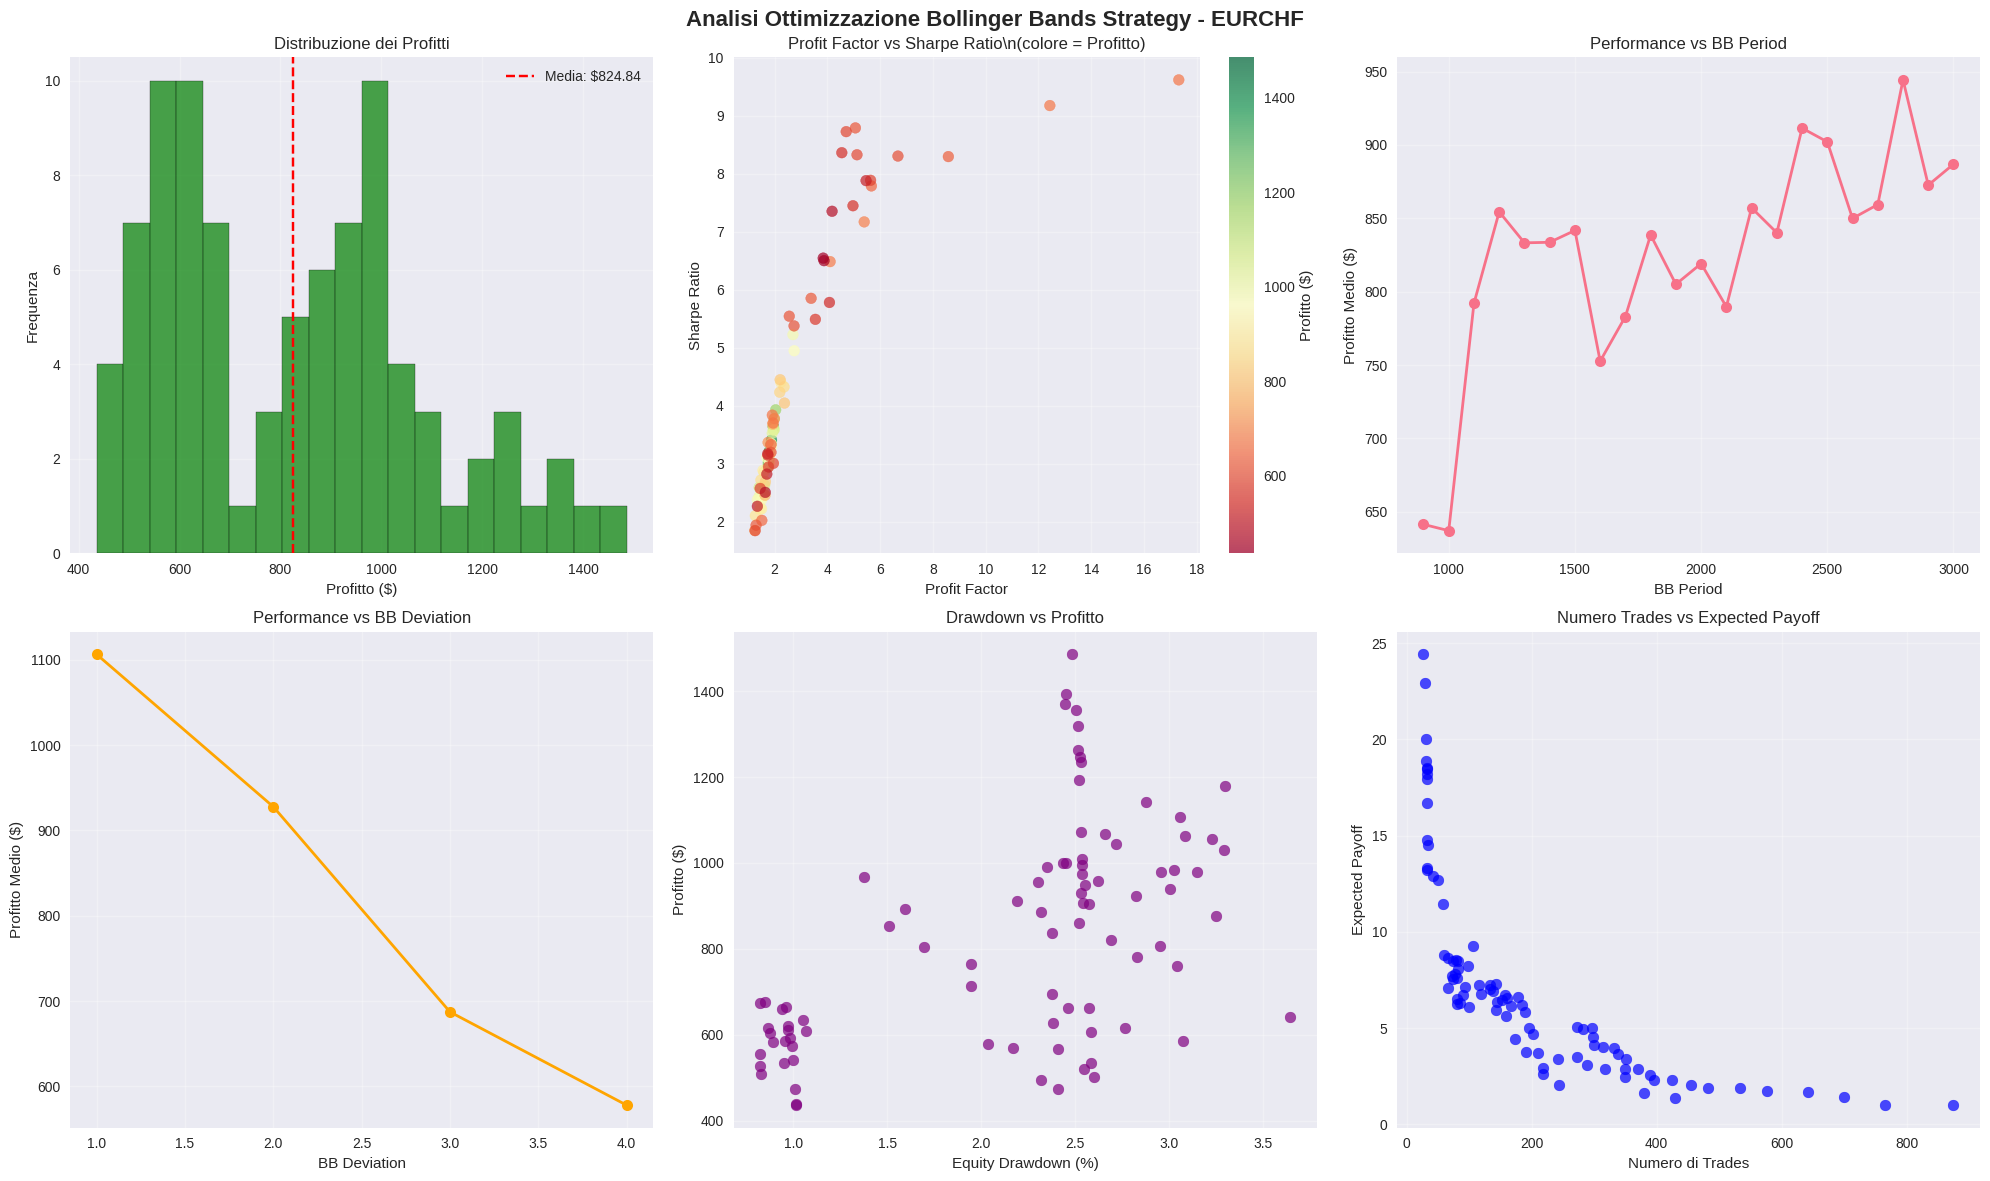

In [8]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Analisi Ottimizzazione Bollinger Bands Strategy - EURCHF', fontsize=16, fontweight='bold')

# 1. Profit distribution
axes[0,0].hist(df['Profit'], bins=20, alpha=0.7, color='green', edgecolor='black')
axes[0,0].axvline(df['Profit'].mean(), color='red', linestyle='--', label=f'Media: ${df["Profit"].mean():.2f}')
axes[0,0].set_xlabel('Profitto ($)')
axes[0,0].set_ylabel('Frequenza')
axes[0,0].set_title('Distribuzione dei Profitti')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Profit Factor vs Sharpe Ratio
scatter = axes[0,1].scatter(df['Profit Factor'], df['Sharpe Ratio'], c=df['Profit'], 
                           cmap='RdYlGn', alpha=0.7, s=60)
axes[0,1].set_xlabel('Profit Factor')
axes[0,1].set_ylabel('Sharpe Ratio')
axes[0,1].set_title('Profit Factor vs Sharpe Ratio\\n(colore = Profitto)')
plt.colorbar(scatter, ax=axes[0,1], label='Profitto ($)')
axes[0,1].grid(True, alpha=0.3)

# 3. BBPeriod vs Performance
bb_period_profit = df.groupby('BBPeriod')['Profit'].mean()
axes[0,2].plot(bb_period_profit.index, bb_period_profit.values, 'o-', linewidth=2, markersize=8)
axes[0,2].set_xlabel('BB Period')
axes[0,2].set_ylabel('Profitto Medio ($)')
axes[0,2].set_title('Performance vs BB Period')
axes[0,2].grid(True, alpha=0.3)

# 4. BBDeviation vs Performance
bb_dev_profit = df.groupby('BBDeviation')['Profit'].mean()
axes[1,0].plot(bb_dev_profit.index, bb_dev_profit.values, 'o-', linewidth=2, markersize=8, color='orange')
axes[1,0].set_xlabel('BB Deviation')
axes[1,0].set_ylabel('Profitto Medio ($)')
axes[1,0].set_title('Performance vs BB Deviation')
axes[1,0].grid(True, alpha=0.3)

# 5. Equity DD vs Profit
axes[1,1].scatter(df['Equity DD %'], df['Profit'], alpha=0.7, c='purple', s=60)
axes[1,1].set_xlabel('Equity Drawdown (%)')
axes[1,1].set_ylabel('Profitto ($)')
axes[1,1].set_title('Drawdown vs Profitto')
axes[1,1].grid(True, alpha=0.3)

# 6. Number of Trades vs Expected Payoff
axes[1,2].scatter(df['Trades'], df['Expected Payoff'], alpha=0.7, c='blue', s=60)
axes[1,2].set_xlabel('Numero di Trades')
axes[1,2].set_ylabel('Expected Payoff')
axes[1,2].set_title('Numero Trades vs Expected Payoff')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

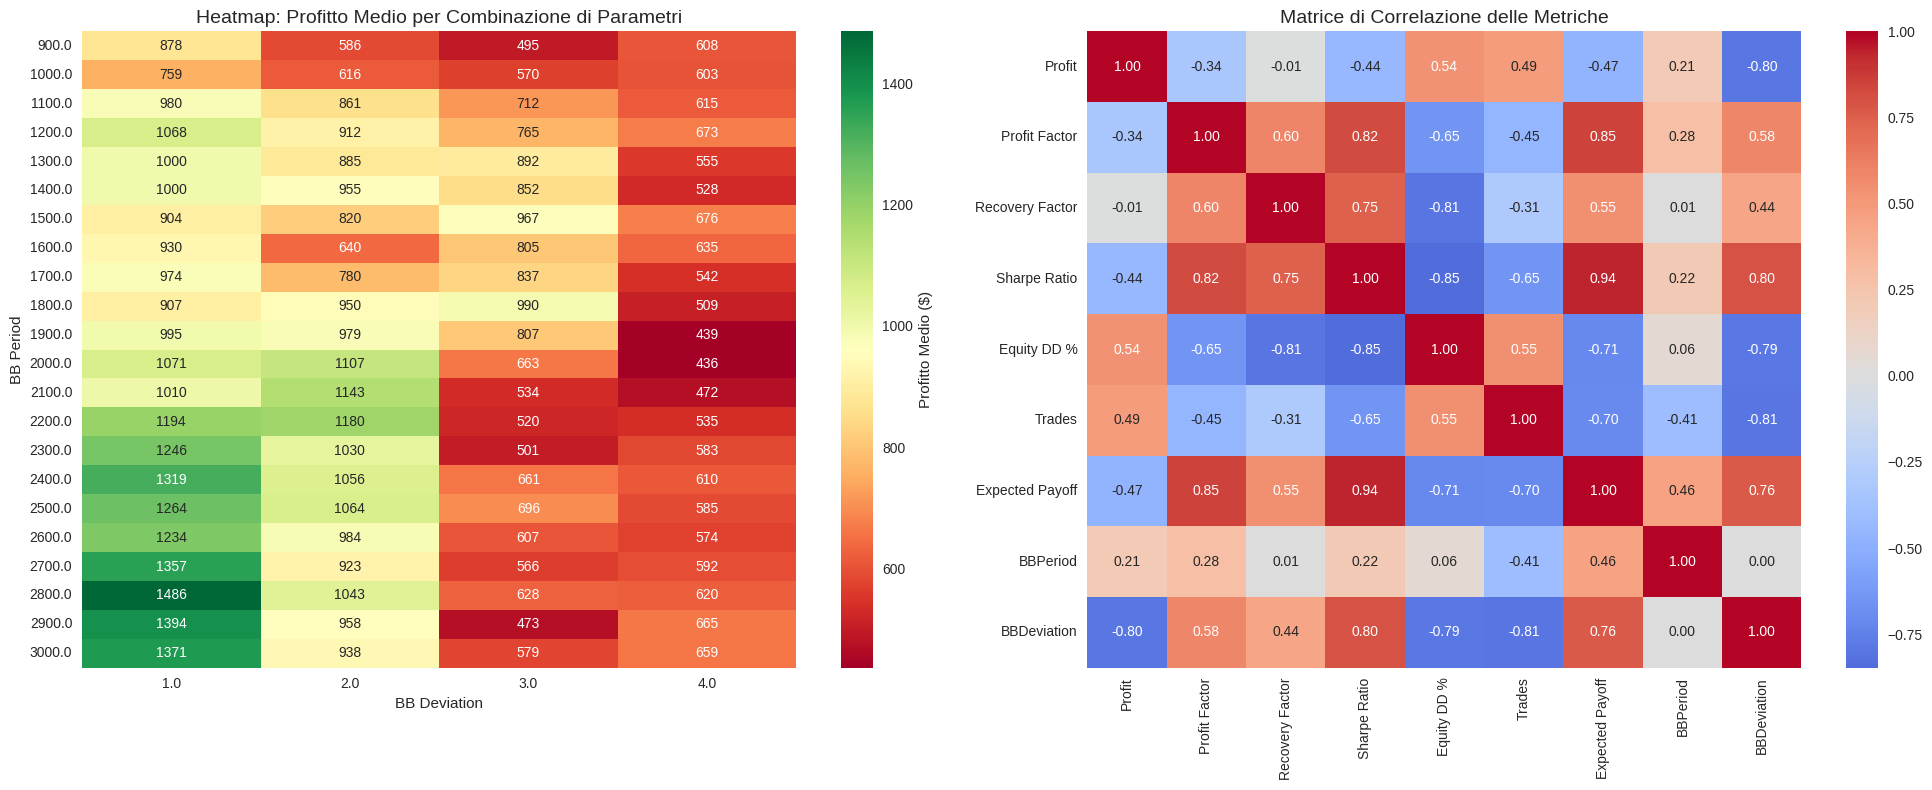

In [9]:
# Heatmap analysis and correlation
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 1. Parameter combination heatmap
pivot_profit = df.pivot_table(values='Profit', index='BBPeriod', columns='BBDeviation', aggfunc='mean')
sns.heatmap(pivot_profit, annot=True, fmt='.0f', cmap='RdYlGn', ax=axes[0], 
            cbar_kws={'label': 'Profitto Medio ($)'})
axes[0].set_title('Heatmap: Profitto Medio per Combinazione di Parametri', fontsize=14)
axes[0].set_xlabel('BB Deviation')
axes[0].set_ylabel('BB Period')

# 2. Correlation matrix
corr_columns = ['Profit', 'Profit Factor', 'Recovery Factor', 'Sharpe Ratio', 
                'Equity DD %', 'Trades', 'Expected Payoff', 'BBPeriod', 'BBDeviation']
correlation_matrix = df[corr_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=axes[1])
axes[1].set_title('Matrice di Correlazione delle Metriche', fontsize=14)

plt.tight_layout()
plt.show()

In [10]:
# Risk Analysis and Final Recommendations
print("=== ANALISI DEL RISCHIO ===")

# Risk metrics analysis
print(f"\\n📊 STATISTICHE DI RISCHIO:")
print(f"Drawdown medio: {df['Equity DD %'].mean():.2f}%")
print(f"Drawdown massimo: {df['Equity DD %'].max():.2f}%")
print(f"Drawdown minimo: {df['Equity DD %'].min():.2f}%")

print(f"\\nProfit Factor medio: {df['Profit Factor'].mean():.3f}")
print(f"Sharpe Ratio medio: {df['Sharpe Ratio'].mean():.3f}")
print(f"Recovery Factor medio: {df['Recovery Factor'].mean():.3f}")

# Risk-adjusted performance
df['Risk_Adjusted_Return'] = df['Profit'] / df['Equity DD %']
df['Profit_per_Trade'] = df['Profit'] / df['Trades']

print(f"\\n=== RANKING STRATEGIE (Risk-Adjusted) ===")
risk_ranking = df.nlargest(10, 'Risk_Adjusted_Return')[['Pass', 'Profit', 'Equity DD %', 'Risk_Adjusted_Return', 'BBPeriod', 'BBDeviation']]
print(risk_ranking)

print(f"\\n=== EFFICIENZA PER TRADE ===")
efficiency_ranking = df.nlargest(10, 'Profit_per_Trade')[['Pass', 'Profit', 'Trades', 'Profit_per_Trade', 'BBPeriod', 'BBDeviation']]
print(efficiency_ranking)

# Final recommendations
print(f"\\n\\n🎯 RACCOMANDAZIONI FINALI:")
print(f"="*50)

profitable_strategies = df[df['Profit'] > 0]
print(f"1. Strategie profittevoli: {len(profitable_strategies)}/{len(df)} ({len(profitable_strategies)/len(df)*100:.1f}%)")

if len(profitable_strategies) > 0:
    best_overall = profitable_strategies.loc[profitable_strategies['Risk_Adjusted_Return'].idxmax()]
    print(f"\\n2. STRATEGIA CONSIGLIATA (migliore risk-adjusted return):")
    print(f"   - BB Period: {best_overall['BBPeriod']}")
    print(f"   - BB Deviation: {best_overall['BBDeviation']}")
    print(f"   - Profitto: ${best_overall['Profit']:.2f}")
    print(f"   - Drawdown: {best_overall['Equity DD %']:.2f}%")
    print(f"   - Profit Factor: {best_overall['Profit Factor']:.3f}")
    print(f"   - Sharpe Ratio: {best_overall['Sharpe Ratio']:.3f}")
    print(f"   - Numero Trades: {best_overall['Trades']}")
    
    print(f"\\n3. PARAMETRI PIÙ STABILI:")
    stable_params = profitable_strategies.groupby(['BBPeriod', 'BBDeviation']).size().reset_index(name='Count')
    most_stable = stable_params.loc[stable_params['Count'].idxmax()]
    print(f"   - BB Period: {most_stable['BBPeriod']} (appare in {most_stable['Count']} test)")
    print(f"   - BB Deviation: {most_stable['BBDeviation']}")

print(f"\\n4. CONSIDERAZIONI SUL RISCHIO:")
high_risk = df[df['Equity DD %'] > df['Equity DD %'].quantile(0.75)]
print(f"   - {len(high_risk)} strategie hanno drawdown > {df['Equity DD %'].quantile(0.75):.1f}%")
print(f"   - Evitare combinazioni con drawdown > {df['Equity DD %'].quantile(0.9):.1f}%")

print(f"\\n5. VOLUME DI TRADING:")
print(f"   - Numero medio di trades: {df['Trades'].mean():.0f}")
print(f"   - Range trades: {df['Trades'].min():.0f} - {df['Trades'].max():.0f}")
print(f"   - Strategie con pochi trades (<50): {len(df[df['Trades'] < 50])} su {len(df)}")

=== ANALISI DEL RISCHIO ===
\n📊 STATISTICHE DI RISCHIO:
Drawdown medio: 2.16%
Drawdown massimo: 3.65%
Drawdown minimo: 0.82%
\nProfit Factor medio: 2.738
Sharpe Ratio medio: 4.190
Recovery Factor medio: 4.113
\n=== RANKING STRATEGIE (Risk-Adjusted) ===
    Pass  Profit  Equity DD %  Risk_Adjusted_Return  BBPeriod  BBDeviation
52  69.0   672.7       0.8220            818.369830    1200.0          4.0
51  72.0   675.9       0.8495            795.644497    1500.0          4.0
62  68.0   614.9       0.8637            711.937015    1100.0          4.0
27  50.0   967.4       1.3765            702.796949    1500.0          3.0
56  87.0   659.3       0.9398            701.532241    3000.0          4.0
53  86.0   665.3       0.9576            694.757728    2900.0          4.0
66  67.0   603.3       0.8747            689.722190    1000.0          4.0
75  70.0   555.4       0.8219            675.751308    1300.0          4.0
70  80.0   583.2       0.8891            655.944213    2300.0          4

In [4]:
# Advanced Statistical Visualizations
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Set up the color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

print("🎨 CREAZIONE VISUALIZZAZIONI AVANZATE...")
print("="*50)

🎨 CREAZIONE VISUALIZZAZIONI AVANZATE...


In [5]:
# 1. 3D Surface Plot for Parameter Optimization
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=['3D Profit Surface', 'Sharpe Ratio Distribution', 'Risk-Return Scatter', 'Parameter Heatmap'],
    specs=[[{"type": "surface"}, {"type": "histogram"}],
           [{"type": "scatter"}, {"type": "heatmap"}]]
)

# Create pivot tables for 3D surface
pivot_profit_3d = df.pivot_table(values='Profit', index='BBPeriod', columns='BBDeviation', aggfunc='mean')
pivot_sharpe_3d = df.pivot_table(values='Sharpe Ratio', index='BBPeriod', columns='BBDeviation', aggfunc='mean')

# 3D Surface plot
fig.add_trace(
    go.Surface(
        z=pivot_profit_3d.values,
        x=pivot_profit_3d.columns,
        y=pivot_profit_3d.index,
        colorscale='Viridis',
        name='Profit Surface'
    ),
    row=1, col=1
)

# Sharpe Ratio Distribution
fig.add_trace(
    go.Histogram(
        x=df['Sharpe Ratio'],
        nbinsx=20,
        name='Sharpe Distribution',
        marker_color='skyblue',
        opacity=0.7
    ),
    row=1, col=2
)

# Risk-Return Scatter
fig.add_trace(
    go.Scatter(
        x=df['Equity DD %'],
        y=df['Profit'],
        mode='markers',
        marker=dict(
            size=df['Trades']/10,
            color=df['Profit Factor'],
            colorscale='RdYlGn',
            showscale=True,
            colorbar=dict(title="Profit Factor", x=0.48)
        ),
        text=df.apply(lambda x: f"BB Period: {x['BBPeriod']}<br>BB Dev: {x['BBDeviation']}<br>Trades: {x['Trades']}", axis=1),
        hovertemplate='Drawdown: %{x:.2f}%<br>Profit: $%{y:.2f}<br>%{text}<extra></extra>',
        name='Strategies'
    ),
    row=2, col=1
)

# Parameter Heatmap
fig.add_trace(
    go.Heatmap(
        z=pivot_profit_3d.values,
        x=pivot_profit_3d.columns,
        y=pivot_profit_3d.index,
        colorscale='RdYlGn',
        name='Profit Heatmap'
    ),
    row=2, col=2
)

# Update layout
fig.update_layout(
    title_text="📊 Analisi Avanzata Ottimizzazione Bollinger Bands - EURCHF",
    title_x=0.5,
    height=800,
    showlegend=False
)

# Update axes labels
fig.update_xaxes(title_text="BB Deviation", row=2, col=2)
fig.update_yaxes(title_text="BB Period", row=2, col=2)
fig.update_xaxes(title_text="Equity DD %", row=2, col=1)
fig.update_yaxes(title_text="Profit ($)", row=2, col=1)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# 2. Interactive Performance Dashboard
fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=[
        'Profit Distribution by BB Period', 'Sharpe Ratio vs Profit Factor', 'Trade Count Analysis',
        'Drawdown Risk Analysis', 'Expected Payoff Distribution', 'Recovery Factor Analysis',
        'Parameter Stability Map', 'Performance Ranking', 'Risk-Adjusted Returns'
    ],
    specs=[[{"type": "bar"}, {"type": "scatter"}, {"type": "box"}],
           [{"type": "scatter"}, {"type": "violin"}, {"type": "bar"}],
           [{"type": "heatmap"}, {"type": "bar"}, {"type": "scatter"}]]
)

# 1. Profit Distribution by BB Period
profit_by_period = df.groupby('BBPeriod')['Profit'].agg(['mean', 'std']).reset_index()
fig.add_trace(
    go.Bar(
        x=profit_by_period['BBPeriod'],
        y=profit_by_period['mean'],
        error_y=dict(type='data', array=profit_by_period['std']),
        name='Avg Profit',
        marker_color='lightblue'
    ),
    row=1, col=1
)

# 2. Sharpe Ratio vs Profit Factor
fig.add_trace(
    go.Scatter(
        x=df['Profit Factor'],
        y=df['Sharpe Ratio'],
        mode='markers',
        marker=dict(
            size=8,
            color=df['Profit'],
            colorscale='Viridis',
            showscale=False
        ),
        text=df['BBPeriod'].astype(str) + ' / ' + df['BBDeviation'].astype(str),
        name='Strategies'
    ),
    row=1, col=2
)

# 3. Trade Count Box Plot by BB Deviation
fig.add_trace(
    go.Box(
        x=df['BBDeviation'],
        y=df['Trades'],
        name='Trade Count',
        marker_color='lightgreen'
    ),
    row=1, col=3
)

# 4. Drawdown Risk Analysis
fig.add_trace(
    go.Scatter(
        x=df['Equity DD %'],
        y=df['Recovery Factor'],
        mode='markers',
        marker=dict(
            size=df['Profit']/50,
            color='red',
            opacity=0.6
        ),
        name='Risk Analysis'
    ),
    row=2, col=1
)

# 5. Expected Payoff Violin Plot
fig.add_trace(
    go.Violin(
        y=df['Expected Payoff'],
        name='Expected Payoff',
        marker_color='purple'
    ),
    row=2, col=2
)

# 6. Recovery Factor by BB Period
recovery_by_period = df.groupby('BBPeriod')['Recovery Factor'].mean().reset_index()
fig.add_trace(
    go.Bar(
        x=recovery_by_period['BBPeriod'],
        y=recovery_by_period['Recovery Factor'],
        name='Recovery Factor',
        marker_color='orange'
    ),
    row=2, col=3
)

# 7. Parameter Stability Heatmap
stability_matrix = df.groupby(['BBPeriod', 'BBDeviation']).size().reset_index(name='count')
stability_pivot = stability_matrix.pivot(index='BBPeriod', columns='BBDeviation', values='count').fillna(0)
fig.add_trace(
    go.Heatmap(
        z=stability_pivot.values,
        x=stability_pivot.columns,
        y=stability_pivot.index,
        colorscale='Blues',
        name='Stability'
    ),
    row=3, col=1
)

# 8. Top 10 Performance Ranking
top_10 = df.nlargest(10, 'Profit').reset_index()
fig.add_trace(
    go.Bar(
        x=top_10.index + 1,
        y=top_10['Profit'],
        name='Top 10 Profit',
        marker_color='gold',
        text=top_10['BBPeriod'].astype(str) + '/' + top_10['BBDeviation'].astype(str),
        textposition='outside'
    ),
    row=3, col=2
)

# 9. Risk-Adjusted Returns
df_temp = df.copy()
df_temp['Risk_Adj'] = df_temp['Profit'] / df_temp['Equity DD %']
fig.add_trace(
    go.Scatter(
        x=df_temp['Profit'],
        y=df_temp['Risk_Adj'],
        mode='markers',
        marker=dict(
            size=8,
            color=df_temp['Sharpe Ratio'],
            colorscale='RdYlBu',
            showscale=False
        ),
        name='Risk-Adjusted'
    ),
    row=3, col=3
)

# Update layout
fig.update_layout(
    title_text="🎯 Dashboard Interattivo - Analisi Completa Performance",
    title_x=0.5,
    height=1200,
    showlegend=False
)

fig.show()

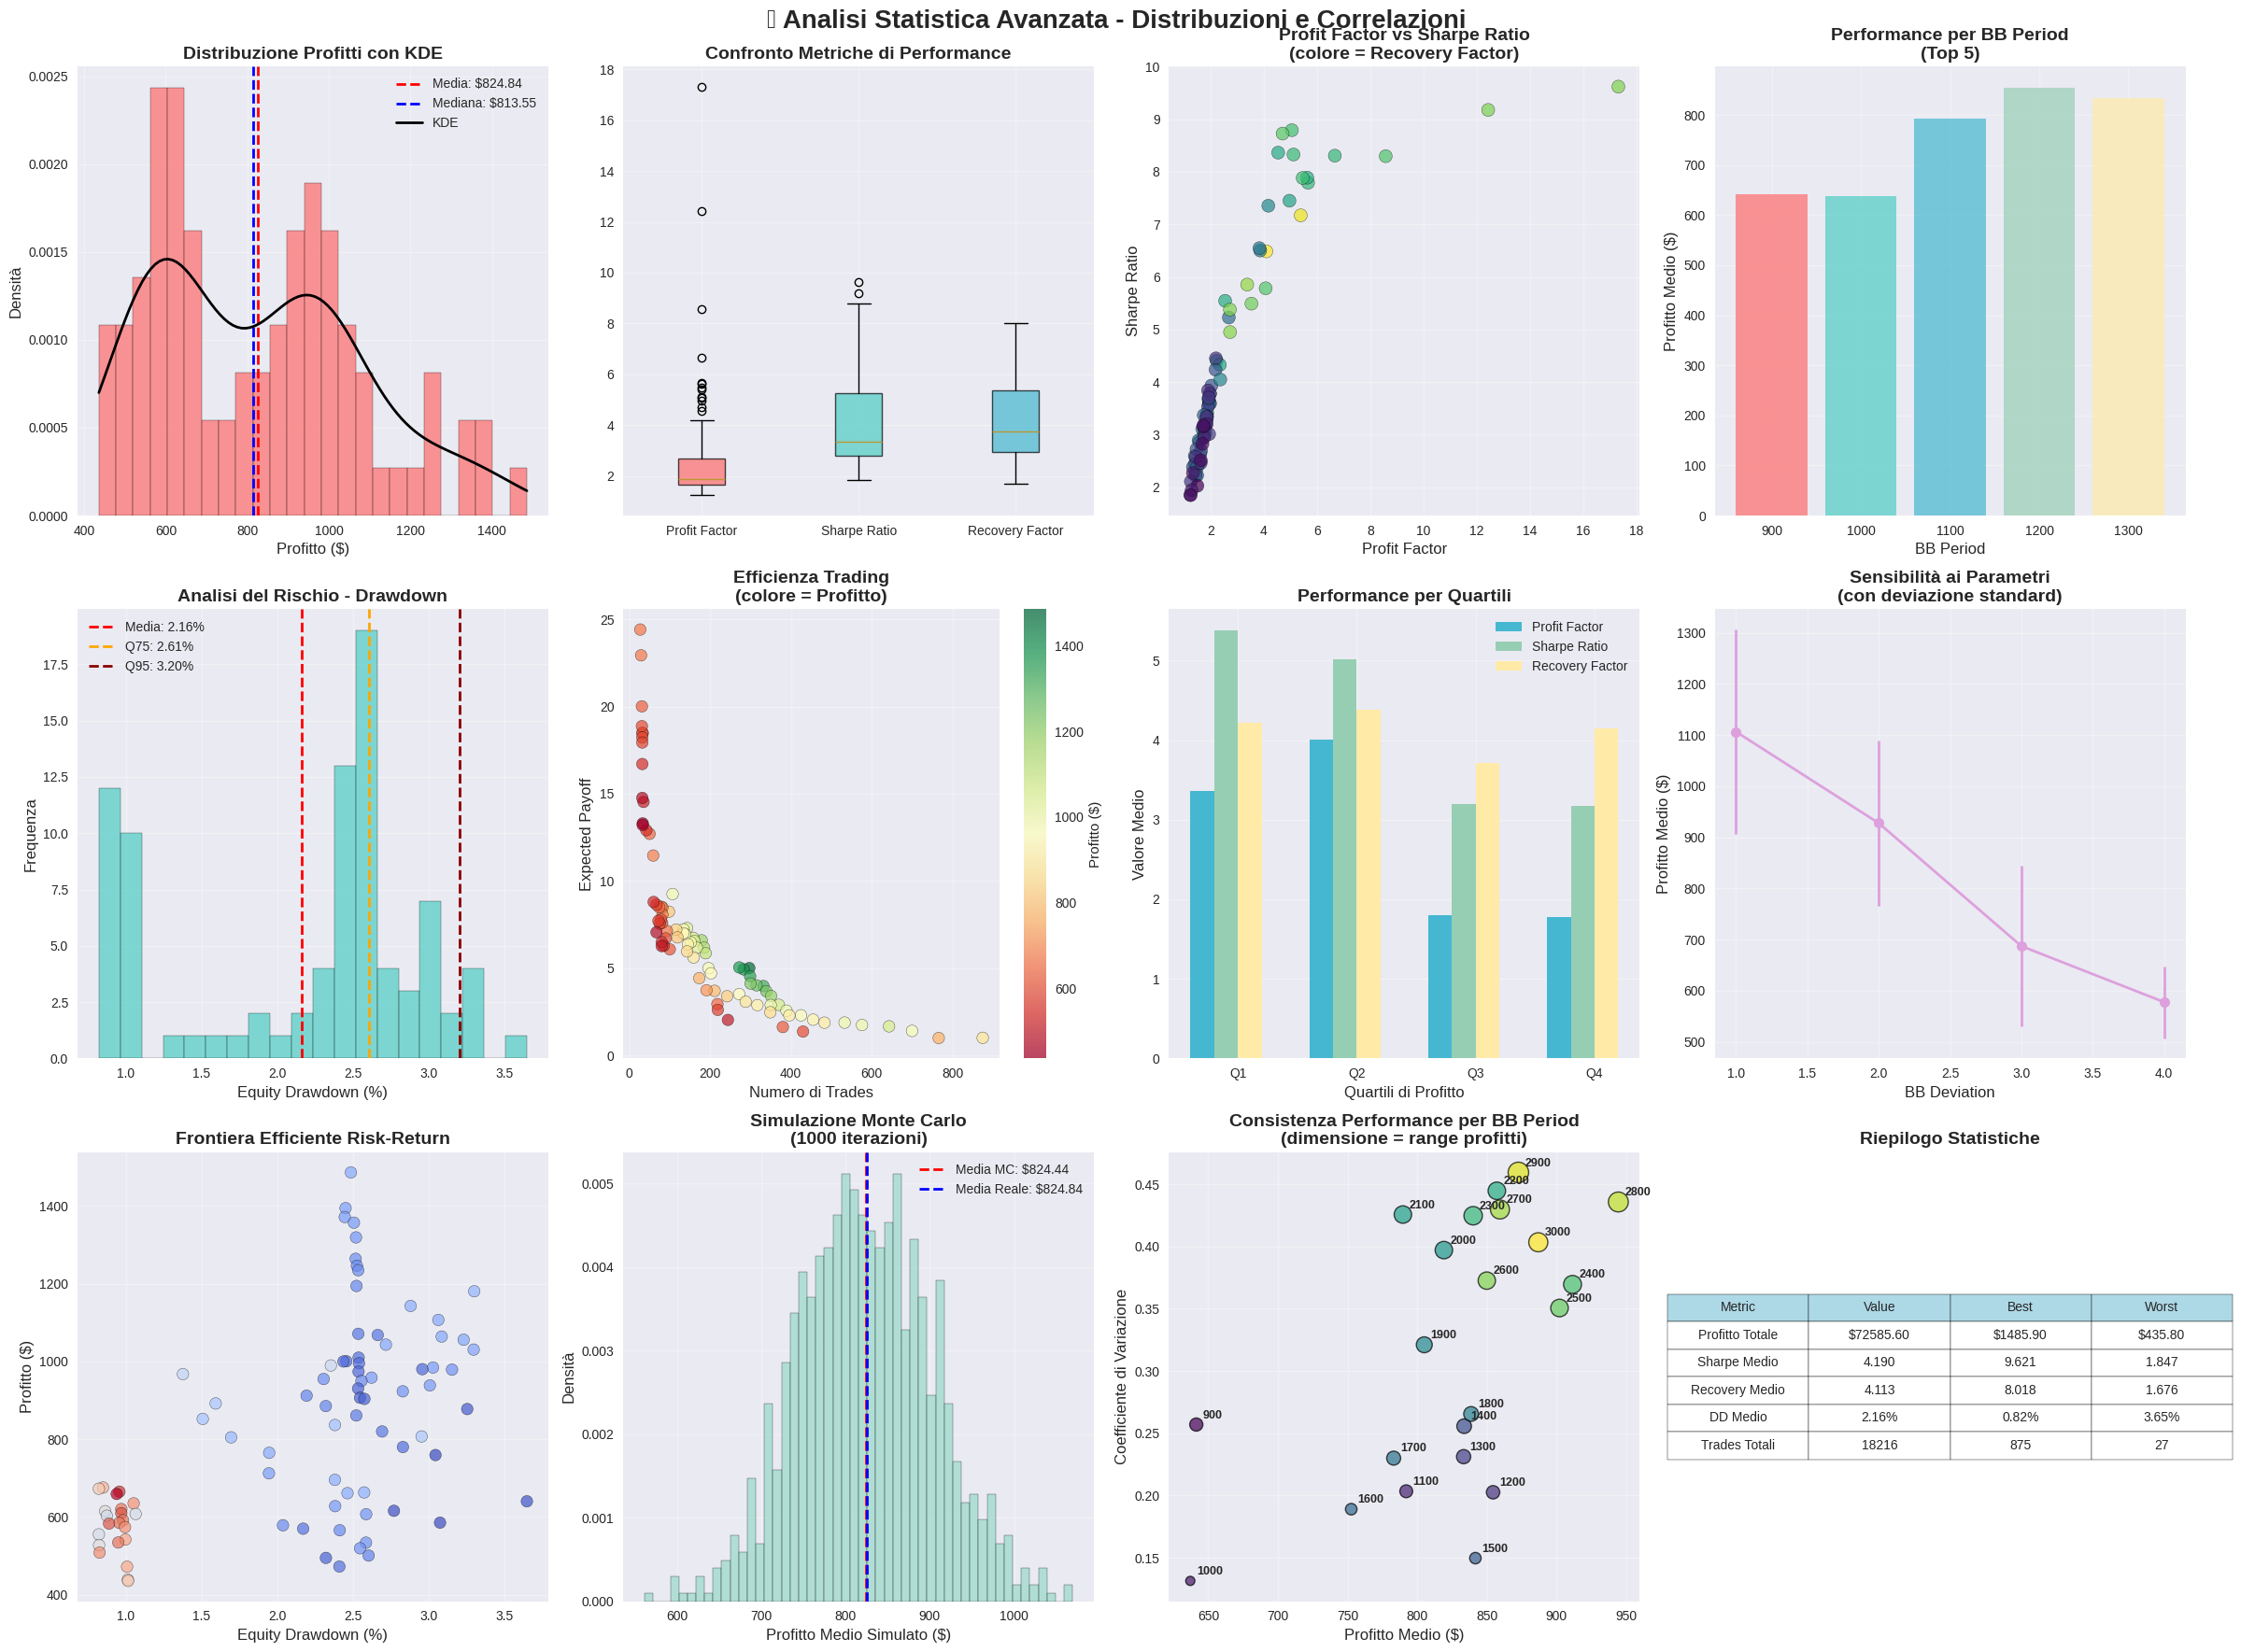

In [10]:
# 3. Advanced Statistical Distribution Analysis
fig, axes = plt.subplots(3, 4, figsize=(24, 18))
fig.suptitle('📈 Analisi Statistica Avanzata - Distribuzioni e Correlazioni', fontsize=20, fontweight='bold')

# Custom color palette
colors_custom = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F']

# 1. Profit Distribution with KDE
axes[0,0].hist(df['Profit'], bins=25, alpha=0.7, color=colors_custom[0], density=True, edgecolor='black')
axes[0,0].axvline(df['Profit'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: ${df["Profit"].mean():.2f}')
axes[0,0].axvline(df['Profit'].median(), color='blue', linestyle='--', linewidth=2, label=f'Mediana: ${df["Profit"].median():.2f}')
# Add KDE
from scipy import stats
x_range = np.linspace(df['Profit'].min(), df['Profit'].max(), 100)
kde = stats.gaussian_kde(df['Profit'])
axes[0,0].plot(x_range, kde(x_range), 'k-', linewidth=2, label='KDE')
axes[0,0].set_xlabel('Profitto ($)', fontsize=12)
axes[0,0].set_ylabel('Densità', fontsize=12)
axes[0,0].set_title('Distribuzione Profitti con KDE', fontsize=14, fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Box Plot comparison
metrics = ['Profit Factor', 'Sharpe Ratio', 'Recovery Factor']
box_data = [df[metric].values for metric in metrics]
bp = axes[0,1].boxplot(box_data, labels=metrics, patch_artist=True)
for patch, color in zip(bp['boxes'], colors_custom[:3]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[0,1].set_title('Confronto Metriche di Performance', fontsize=14, fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# 3. Scatter Matrix Style Plot
axes[0,2].scatter(df['Profit Factor'], df['Sharpe Ratio'], c=df['Recovery Factor'], 
                 cmap='viridis', s=100, alpha=0.7, edgecolors='black')
axes[0,2].set_xlabel('Profit Factor', fontsize=12)
axes[0,2].set_ylabel('Sharpe Ratio', fontsize=12)
axes[0,2].set_title('Profit Factor vs Sharpe Ratio\n(colore = Recovery Factor)', fontsize=14, fontweight='bold')
axes[0,2].grid(True, alpha=0.3)

# 4. Performance Comparison Bar Chart
bb_periods = sorted(df['BBPeriod'].unique())[:5]  # Top 5 periods
period_profits = []
period_labels = []
for period in bb_periods:
    period_data = df[df['BBPeriod'] == period]
    period_profits.append(period_data['Profit'].mean())
    period_labels.append(f'{int(period)}')

axes[0,3].bar(period_labels, period_profits, color=colors_custom[:len(period_labels)], alpha=0.7)
axes[0,3].set_xlabel('BB Period', fontsize=12)
axes[0,3].set_ylabel('Profitto Medio ($)', fontsize=12)
axes[0,3].set_title('Performance per BB Period\n(Top 5)', fontsize=14, fontweight='bold')
axes[0,3].grid(True, alpha=0.3)

# 5. Drawdown Analysis
axes[1,0].hist(df['Equity DD %'], bins=20, alpha=0.7, color=colors_custom[1], edgecolor='black')
axes[1,0].axvline(df['Equity DD %'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["Equity DD %"].mean():.2f}%')
q75 = df['Equity DD %'].quantile(0.75)
q95 = df['Equity DD %'].quantile(0.95)
axes[1,0].axvline(q75, color='orange', linestyle='--', linewidth=2, label=f'Q75: {q75:.2f}%')
axes[1,0].axvline(q95, color='darkred', linestyle='--', linewidth=2, label=f'Q95: {q95:.2f}%')
axes[1,0].set_xlabel('Equity Drawdown (%)', fontsize=12)
axes[1,0].set_ylabel('Frequenza', fontsize=12)
axes[1,0].set_title('Analisi del Rischio - Drawdown', fontsize=14, fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 6. Trade Count vs Expected Payoff
scatter = axes[1,1].scatter(df['Trades'], df['Expected Payoff'], 
                           c=df['Profit'], cmap='RdYlGn', s=80, alpha=0.7, edgecolors='black')
axes[1,1].set_xlabel('Numero di Trades', fontsize=12)
axes[1,1].set_ylabel('Expected Payoff', fontsize=12)
axes[1,1].set_title('Efficienza Trading\n(colore = Profitto)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, ax=axes[1,1], label='Profitto ($)')
axes[1,1].grid(True, alpha=0.3)

# 7. Performance Ranking by Quartiles
df['Profit_Quartile'] = pd.qcut(df['Profit'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
quartile_stats = df.groupby('Profit_Quartile').agg({
    'Profit Factor': 'mean',
    'Sharpe Ratio': 'mean',
    'Recovery Factor': 'mean',
    'Equity DD %': 'mean'
}).round(3)

x = np.arange(len(quartile_stats.index))
width = 0.2
axes[1,2].bar(x - 1.5*width, quartile_stats['Profit Factor'], width, label='Profit Factor', color=colors_custom[2])
axes[1,2].bar(x - 0.5*width, quartile_stats['Sharpe Ratio'], width, label='Sharpe Ratio', color=colors_custom[3])
axes[1,2].bar(x + 0.5*width, quartile_stats['Recovery Factor'], width, label='Recovery Factor', color=colors_custom[4])
axes[1,2].set_xlabel('Quartili di Profitto', fontsize=12)
axes[1,2].set_ylabel('Valore Medio', fontsize=12)
axes[1,2].set_title('Performance per Quartili', fontsize=14, fontweight='bold')
axes[1,2].set_xticks(x)
axes[1,2].set_xticklabels(quartile_stats.index)
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

# 8. Parameter Sensitivity Analysis
bb_dev_stats = df.groupby('BBDeviation').agg({
    'Profit': ['mean', 'std'],
    'Equity DD %': 'mean',
    'Trades': 'mean'
}).round(2)
bb_dev_stats.columns = ['Profit_Mean', 'Profit_Std', 'DD_Mean', 'Trades_Mean']

x_dev = bb_dev_stats.index
axes[1,3].errorbar(x_dev, bb_dev_stats['Profit_Mean'], yerr=bb_dev_stats['Profit_Std'], 
                  marker='o', linewidth=2, markersize=8, capsize=5, color=colors_custom[5])
axes[1,3].set_xlabel('BB Deviation', fontsize=12)
axes[1,3].set_ylabel('Profitto Medio ($)', fontsize=12)
axes[1,3].set_title('Sensibilità ai Parametri\n(con deviazione standard)', fontsize=14, fontweight='bold')
axes[1,3].grid(True, alpha=0.3)

# 9. Risk-Return Efficiency Frontier
axes[2,0].scatter(df['Equity DD %'], df['Profit'], c=df['Sharpe Ratio'], 
                 cmap='coolwarm', s=80, alpha=0.7, edgecolors='black')
# Add efficient frontier line
from scipy.optimize import curve_fit
def exponential_func(x, a, b, c):
    return a * np.exp(-b * x) + c

try:
    popt, _ = curve_fit(exponential_func, df['Equity DD %'], df['Profit'])
    x_line = np.linspace(df['Equity DD %'].min(), df['Equity DD %'].max(), 100)
    y_line = exponential_func(x_line, *popt)
    axes[2,0].plot(x_line, y_line, 'r--', linewidth=2, label='Efficient Frontier')
except:
    pass
axes[2,0].set_xlabel('Equity Drawdown (%)', fontsize=12)
axes[2,0].set_ylabel('Profitto ($)', fontsize=12)
axes[2,0].set_title('Frontiera Efficiente Risk-Return', fontsize=14, fontweight='bold')
axes[2,0].legend()
axes[2,0].grid(True, alpha=0.3)

# 10. Monte Carlo Simulation Visualization
np.random.seed(42)
mc_results = []
for _ in range(1000):
    sample = df.sample(n=min(10, len(df)), replace=True)
    mc_results.append(sample['Profit'].mean())

axes[2,1].hist(mc_results, bins=50, alpha=0.7, color=colors_custom[6], density=True, edgecolor='black')
axes[2,1].axvline(np.mean(mc_results), color='red', linestyle='--', linewidth=2, label=f'Media MC: ${np.mean(mc_results):.2f}')
axes[2,1].axvline(df['Profit'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Media Reale: ${df["Profit"].mean():.2f}')
axes[2,1].set_xlabel('Profitto Medio Simulato ($)', fontsize=12)
axes[2,1].set_ylabel('Densità', fontsize=12)
axes[2,1].set_title('Simulazione Monte Carlo\n(1000 iterazioni)', fontsize=14, fontweight='bold')
axes[2,1].legend()
axes[2,1].grid(True, alpha=0.3)

# 11. Parameter Performance Consistency Analysis
# Create stability analysis based on performance relative to parameter groups
bb_period_consistency = df.groupby('BBPeriod').agg({
    'Profit': ['mean', 'std', 'min', 'max'],
    'Sharpe Ratio': ['mean', 'std']
}).round(3)

bb_period_consistency.columns = ['Profit_Mean', 'Profit_Std', 'Profit_Min', 'Profit_Max', 'Sharpe_Mean', 'Sharpe_Std']
bb_period_consistency['Profit_CV'] = bb_period_consistency['Profit_Std'] / bb_period_consistency['Profit_Mean']
bb_period_consistency['Profit_Range'] = bb_period_consistency['Profit_Max'] - bb_period_consistency['Profit_Min']

# Create scatter plot showing consistency
x_consistency = bb_period_consistency['Profit_Mean']
y_consistency = bb_period_consistency['Profit_CV'].fillna(0)  # Fill NaN with 0
size_consistency = bb_period_consistency['Profit_Range']

# Normalize sizes for better visualization
size_normalized = (size_consistency - size_consistency.min()) / (size_consistency.max() - size_consistency.min()) * 200 + 50

scatter_consistency = axes[2,2].scatter(x_consistency, y_consistency, 
                                       s=size_normalized, alpha=0.7, 
                                       c=bb_period_consistency.index, cmap='viridis',
                                       edgecolors='black', linewidth=1)

# Add labels for each point
for i, (period, row) in enumerate(bb_period_consistency.iterrows()):
    axes[2,2].annotate(f'{int(period)}', 
                      (row['Profit_Mean'], row['Profit_CV']), 
                      xytext=(5, 5), textcoords='offset points',
                      fontsize=9, fontweight='bold')

axes[2,2].set_xlabel('Profitto Medio ($)', fontsize=12)
axes[2,2].set_ylabel('Coefficiente di Variazione', fontsize=12)
axes[2,2].set_title('Consistenza Performance per BB Period\n(dimensione = range profitti)', fontsize=14, fontweight='bold')
axes[2,2].grid(True, alpha=0.3)

# 12. Final Summary Statistics
summary_stats = {
    'Metric': ['Profitto Totale', 'Sharpe Medio', 'Recovery Medio', 'DD Medio', 'Trades Totali'],
    'Value': [f"${df['Profit'].sum():.2f}", f"{df['Sharpe Ratio'].mean():.3f}", 
              f"{df['Recovery Factor'].mean():.3f}", f"{df['Equity DD %'].mean():.2f}%",
              f"{df['Trades'].sum():.0f}"],
    'Best': [f"${df['Profit'].max():.2f}", f"{df['Sharpe Ratio'].max():.3f}",
             f"{df['Recovery Factor'].max():.3f}", f"{df['Equity DD %'].min():.2f}%",
             f"{df['Trades'].max():.0f}"],
    'Worst': [f"${df['Profit'].min():.2f}", f"{df['Sharpe Ratio'].min():.3f}",
              f"{df['Recovery Factor'].min():.3f}", f"{df['Equity DD %'].max():.2f}%",
              f"{df['Trades'].min():.0f}"]
}

# Create a table visualization
table_data = pd.DataFrame(summary_stats)
axes[2,3].axis('tight')
axes[2,3].axis('off')
table = axes[2,3].table(cellText=table_data.values,
                       colLabels=table_data.columns,
                       cellLoc='center',
                       loc='center',
                       colColours=['lightblue']*4)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
axes[2,3].set_title('Riepilogo Statistiche', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [7]:
# 4. Modern Interactive Visualizations with Plotly
print("🚀 CREAZIONE GRAFICI INTERATTIVI MODERNI...")

# Interactive Sunburst Chart for Parameter Analysis
df_sunburst = df.copy()
df_sunburst['BB_Period_Range'] = pd.cut(df_sunburst['BBPeriod'], bins=5, labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])
df_sunburst['BB_Dev_Range'] = pd.cut(df_sunburst['BBDeviation'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])
df_sunburst['Profit_Category'] = pd.cut(df_sunburst['Profit'], bins=3, labels=['Low Profit', 'Medium Profit', 'High Profit'])

sunburst_data = df_sunburst.groupby(['BB_Period_Range', 'BB_Dev_Range', 'Profit_Category']).agg({
    'Profit': 'sum',
    'Trades': 'sum'
}).reset_index()

fig_sunburst = go.Figure(go.Sunburst(
    labels=sunburst_data['BB_Period_Range'].astype(str) + ' / ' + sunburst_data['BB_Dev_Range'].astype(str) + ' / ' + sunburst_data['Profit_Category'].astype(str),
    parents=[''] * len(sunburst_data),
    values=sunburst_data['Profit'],
    branchvalues="total",
    hovertemplate='<b>%{label}</b><br>Profit: $%{value:.2f}<extra></extra>',
    maxdepth=3,
))

fig_sunburst.update_layout(
    title="🌟 Analisi Gerarchica Parametri - Sunburst Chart",
    title_x=0.5,
    height=600
)
fig_sunburst.show()

🚀 CREAZIONE GRAFICI INTERATTIVI MODERNI...


In [8]:
# 5. Advanced Analytics: Waterfall Chart and Performance Timeline

# Waterfall Chart for Performance Breakdown
performance_components = {
    'Base Performance': df['Profit'].mean(),
    'Best BB Period Effect': df.groupby('BBPeriod')['Profit'].mean().max() - df['Profit'].mean(),
    'Best BB Deviation Effect': df.groupby('BBDeviation')['Profit'].mean().max() - df['Profit'].mean(),
    'Risk Adjustment': -df['Equity DD %'].mean() * 10,  # Negative impact of risk
    'Trade Frequency Bonus': (df['Trades'].mean() - df['Trades'].min()) * 2,
    'Final Performance': df['Profit'].max()
}

# Create waterfall data
categories = list(performance_components.keys())
values = list(performance_components.values())
cumulative = np.cumsum([0] + values[:-1])

fig_waterfall = go.Figure()

# Add bars for each component
for i, (cat, val) in enumerate(zip(categories[:-1], values[:-1])):
    color = 'green' if val > 0 else 'red'
    fig_waterfall.add_trace(go.Bar(
        x=[cat],
        y=[val],
        base=cumulative[i] if i > 0 else 0,
        marker_color=color,
        name=cat,
        text=f'${val:.2f}',
        textposition='auto'
    ))

# Add final bar
fig_waterfall.add_trace(go.Bar(
    x=[categories[-1]],
    y=[values[-1]],
    marker_color='blue',
    name=categories[-1],
    text=f'${values[-1]:.2f}',
    textposition='auto'
))

fig_waterfall.update_layout(
    title="💧 Waterfall Analysis - Componenti della Performance",
    title_x=0.5,
    height=500,
    showlegend=False,
    xaxis_title="Componenti",
    yaxis_title="Impatto ($)"
)
fig_waterfall.show()

# Performance Radar Chart per ogni BB Deviation
fig_radar = go.Figure()

deviation_values = sorted(df['BBDeviation'].unique())
metrics = ['Profit', 'Profit Factor', 'Sharpe Ratio', 'Recovery Factor']

for dev in deviation_values:
    dev_data = df[df['BBDeviation'] == dev]
    
    # Normalize metrics to 0-1 scale for radar chart
    radar_values = []
    for metric in metrics:
        if metric == 'Profit':
            normalized = (dev_data[metric].mean() - df[metric].min()) / (df[metric].max() - df[metric].min())
        else:
            normalized = (dev_data[metric].mean() - df[metric].min()) / (df[metric].max() - df[metric].min())
        radar_values.append(normalized)
    
    # Close the radar chart
    radar_values += [radar_values[0]]
    
    fig_radar.add_trace(go.Scatterpolar(
        r=radar_values,
        theta=metrics + [metrics[0]],
        fill='toself',
        name=f'BB Deviation {dev}',
        line_color=colors[int(dev)-1] if int(dev)-1 < len(colors) else colors[0]
    ))

fig_radar.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    title="🎯 Radar Chart Comparativo - Performance per BB Deviation",
    title_x=0.5,
    height=600
)
fig_radar.show()

# Animated Bubble Chart (simulating time progression through different parameters)
fig_animated = px.scatter(
    df, 
    x="Equity DD %", 
    y="Profit",
    size="Trades", 
    color="Profit Factor",
    hover_name="Pass",
    size_max=50,
    animation_frame="BBPeriod",
    animation_group="BBDeviation",
    title="🎬 Animated Analysis - Risk vs Return nel tempo",
    labels={
        "Equity DD %": "Drawdown Risk (%)",
        "Profit": "Profit ($)",
        "Trades": "Number of Trades",
        "Profit Factor": "Profit Factor"
    }
)

fig_animated.update_layout(
    title_x=0.5,
    height=600
)
fig_animated.show()

In [11]:
# 6. Final Summary Dashboard with Key Insights
print("📊 DASHBOARD FINALE - INSIGHTS E RACCOMANDAZIONI")
print("="*60)

# Create a comprehensive summary dashboard
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=[
        'Top 5 Strategie Consigliate', 'Distribuzione Risk-Adjusted Returns', 
        'Efficienza Parametri', 'Analisi Stabilità', 'Performance Outliers', 
        'ROI vs Drawdown Optimization'
    ],
    specs=[[{"type": "table"}, {"type": "histogram"}, {"type": "heatmap"}],
           [{"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}]]
)

# 1. Top 5 Recommended Strategies Table
df['ROI'] = (df['Profit'] / 10000) * 100  # Assuming 10k initial capital
df['Risk_Score'] = df['Equity DD %'] / df['Profit Factor']  # Lower is better
df['Overall_Score'] = (df['ROI'] * df['Sharpe Ratio']) / df['Risk_Score']

top_strategies = df.nlargest(5, 'Overall_Score')[
    ['Pass', 'BBPeriod', 'BBDeviation', 'Profit', 'ROI', 'Sharpe Ratio', 'Equity DD %']
].round(2)

fig.add_trace(
    go.Table(
        header=dict(values=['Rank', 'BB Period', 'BB Dev', 'Profit ($)', 'ROI (%)', 'Sharpe', 'DD (%)'],
                   fill_color='lightblue',
                   align='center',
                   font_size=12),
        cells=dict(values=[
            list(range(1, 6)),
            top_strategies['BBPeriod'],
            top_strategies['BBDeviation'], 
            top_strategies['Profit'],
            top_strategies['ROI'],
            top_strategies['Sharpe Ratio'],
            top_strategies['Equity DD %']
        ],
        fill_color='white',
        align='center',
        font_size=11)
    ),
    row=1, col=1
)

# 2. Risk-Adjusted Returns Distribution
risk_adj_returns = df['Profit'] / df['Equity DD %']
fig.add_trace(
    go.Histogram(
        x=risk_adj_returns,
        nbinsx=20,
        name='Risk-Adj Returns',
        marker_color='skyblue',
        opacity=0.7
    ),
    row=1, col=2
)

# 3. Parameter Efficiency Heatmap
efficiency_matrix = df.groupby(['BBPeriod', 'BBDeviation'])['Overall_Score'].mean().reset_index()
efficiency_pivot = efficiency_matrix.pivot(index='BBPeriod', columns='BBDeviation', values='Overall_Score')

fig.add_trace(
    go.Heatmap(
        z=efficiency_pivot.values,
        x=efficiency_pivot.columns,
        y=efficiency_pivot.index,
        colorscale='RdYlGn',
        name='Efficiency'
    ),
    row=1, col=3
)

# 4. Stability Analysis (Performance Consistency by Parameter Groups)
# Analyze consistency within BB Period groups
bb_period_stability = df.groupby('BBPeriod').agg({
    'Profit': ['mean', 'std', 'count'],
    'Sharpe Ratio': ['mean', 'std']
}).round(3)

bb_period_stability.columns = ['Profit_Mean', 'Profit_Std', 'Count', 'Sharpe_Mean', 'Sharpe_Std']
bb_period_stability['Profit_CV'] = (bb_period_stability['Profit_Std'] / bb_period_stability['Profit_Mean']).fillna(0)
bb_period_stability['Sharpe_CV'] = (bb_period_stability['Sharpe_Std'] / bb_period_stability['Sharpe_Mean']).fillna(0)
bb_period_stability = bb_period_stability.reset_index()

# Filter out single-point groups and infinite values
bb_period_stability = bb_period_stability[bb_period_stability['Count'] > 1]
bb_period_stability = bb_period_stability[np.isfinite(bb_period_stability['Profit_CV']) & np.isfinite(bb_period_stability['Sharpe_CV'])]

if len(bb_period_stability) > 0:
    fig.add_trace(
        go.Scatter(
            x=bb_period_stability['Profit_CV'],
            y=bb_period_stability['Sharpe_CV'],
            mode='markers',
            marker=dict(
                size=bb_period_stability['Count']*5,
                color=bb_period_stability['Profit_Mean'],
                colorscale='Viridis',
                showscale=False
            ),
            text=bb_period_stability['BBPeriod'].astype(str),
            name='BB Period Stability'
        ),
        row=2, col=1
    )
else:
    # If no multi-point groups, show parameter distribution
    fig.add_trace(
        go.Scatter(
            x=df['BBPeriod'],
            y=df['BBDeviation'],
            mode='markers',
            marker=dict(
                size=df['Profit']/50,
                color=df['Sharpe Ratio'],
                colorscale='Viridis',
                showscale=False
            ),
            text=df['Profit'].round(2).astype(str),
            name='Parameter Distribution'
        ),
        row=2, col=1
    )

# 5. Performance Outliers Detection
from scipy import stats
z_scores = np.abs(stats.zscore(df['Profit']))
outliers = df[z_scores > 2]

fig.add_trace(
    go.Scatter(
        x=df['Profit Factor'],
        y=df['Profit'],
        mode='markers',
        marker=dict(color='lightblue', size=8),
        name='Normal',
        opacity=0.6
    ),
    row=2, col=2
)

if len(outliers) > 0:
    fig.add_trace(
        go.Scatter(
            x=outliers['Profit Factor'],
            y=outliers['Profit'],
            mode='markers',
            marker=dict(color='red', size=12, symbol='star'),
            name='Outliers',
            text=outliers['BBPeriod'].astype(str) + '/' + outliers['BBDeviation'].astype(str)
        ),
        row=2, col=2
    )

# 6. ROI vs Drawdown Optimization
pareto_front = []
for i, row in df.iterrows():
    is_pareto = True
    for j, other_row in df.iterrows():
        if i != j:
            if (other_row['ROI'] >= row['ROI'] and other_row['Equity DD %'] <= row['Equity DD %'] and 
                (other_row['ROI'] > row['ROI'] or other_row['Equity DD %'] < row['Equity DD %'])):
                is_pareto = False
                break
    if is_pareto:
        pareto_front.append(i)

fig.add_trace(
    go.Scatter(
        x=df['Equity DD %'],
        y=df['ROI'],
        mode='markers',
        marker=dict(color='lightcoral', size=8),
        name='All Strategies',
        opacity=0.6
    ),
    row=2, col=3
)

if pareto_front:
    pareto_df = df.iloc[pareto_front].sort_values('Equity DD %')
    fig.add_trace(
        go.Scatter(
            x=pareto_df['Equity DD %'],
            y=pareto_df['ROI'],
            mode='markers+lines',
            marker=dict(color='green', size=12),
            line=dict(color='green', width=2),
            name='Pareto Front'
        ),
        row=2, col=3
    )

# Update layout
fig.update_layout(
    title_text="🎯 DASHBOARD FINALE - Summary & Recommendations",
    title_x=0.5,
    height=800,
    showlegend=True
)

# Update axes labels
fig.update_xaxes(title_text="Profit CV / BB Period", row=2, col=1)
fig.update_yaxes(title_text="Sharpe CV / BB Deviation", row=2, col=1)
fig.update_xaxes(title_text="Profit Factor", row=2, col=2)
fig.update_yaxes(title_text="Profit ($)", row=2, col=2)
fig.update_xaxes(title_text="Drawdown (%)", row=2, col=3)
fig.update_yaxes(title_text="ROI (%)", row=2, col=3)

fig.show()

# Print Final Insights
print(f"\\n🎯 INSIGHTS FINALI:")
print(f"="*40)
print(f"📈 Migliore strategia overall: BB Period {top_strategies.iloc[0]['BBPeriod']}, BB Deviation {top_strategies.iloc[0]['BBDeviation']}")
print(f"💰 ROI massimo raggiunto: {df['ROI'].max():.2f}%")
print(f"⚡ Sharpe Ratio medio: {df['Sharpe Ratio'].mean():.3f}")
print(f"🛡️ Drawdown medio: {df['Equity DD %'].mean():.2f}%")
print(f"🎲 Numero di outliers identificati: {len(outliers)}")
print(f"🏆 Strategie nel Pareto Front: {len(pareto_front)}")

print(f"\\n📊 RACCOMANDAZIONE FINALE:")
print(f"="*40)
best_strategy = top_strategies.iloc[0]
print(f"✅ Usa BB Period: {best_strategy['BBPeriod']}")
print(f"✅ Usa BB Deviation: {best_strategy['BBDeviation']}")
print(f"✅ Profitto atteso: ${best_strategy['Profit']:.2f}")
print(f"✅ ROI atteso: {best_strategy['ROI']:.2f}%")
print(f"✅ Rischio (DD): {best_strategy['Equity DD %']:.2f}%")

📊 DASHBOARD FINALE - INSIGHTS E RACCOMANDAZIONI


\n🎯 INSIGHTS FINALI:
📈 Migliore strategia overall: BB Period 3000.0, BB Deviation 4.0
💰 ROI massimo raggiunto: 14.86%
⚡ Sharpe Ratio medio: 4.190
🛡️ Drawdown medio: 2.16%
🎲 Numero di outliers identificati: 4
🏆 Strategie nel Pareto Front: 9
\n📊 RACCOMANDAZIONE FINALE:
✅ Usa BB Period: 3000.0
✅ Usa BB Deviation: 4.0
✅ Profitto atteso: $659.30
✅ ROI atteso: 6.59%
✅ Rischio (DD): 0.94%
